# Tests for Regalia Filter
Contains tests for the first order and second order filter of the regalia implementation
If not stated otherwise:
- fs: 48e3 (default)
- band limitation from 0.1Hz to 24kHz is active and avoids phase issues with frequencies smaller 0.1Hz or greater 24kHz

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import eq_regalia as eq

### Test first order filter

Configuration either in HPF (default) or LPF

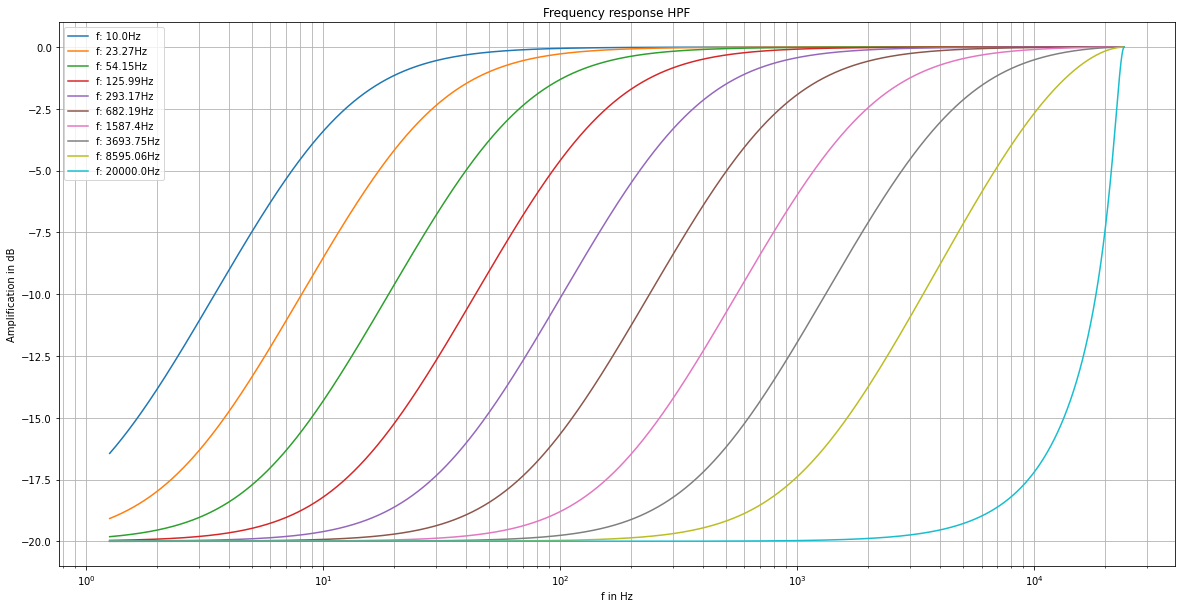

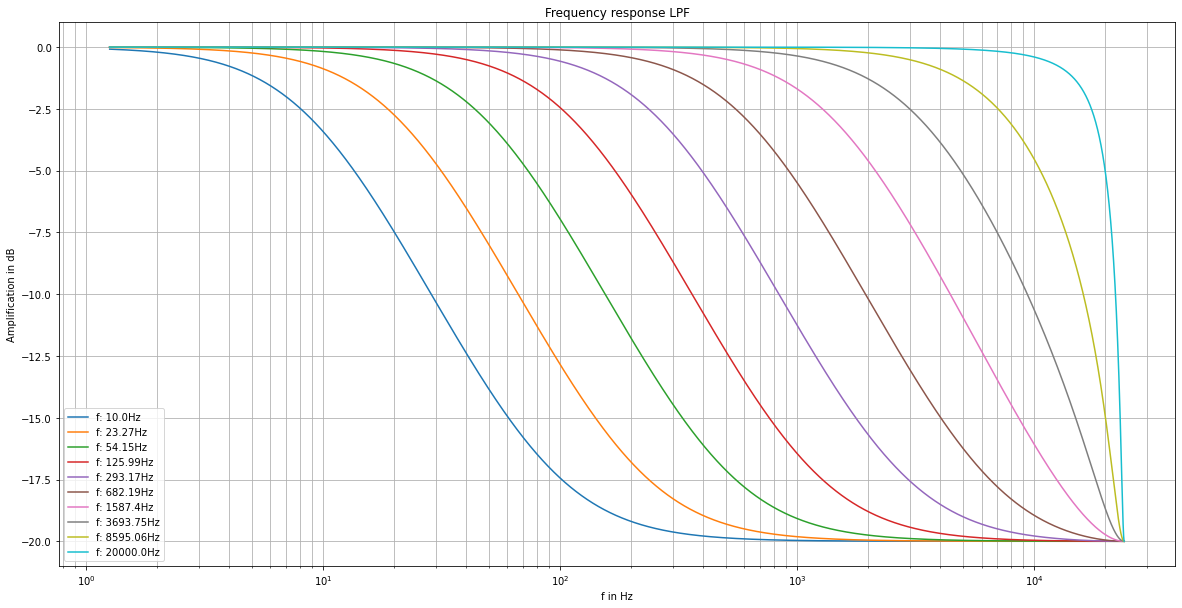

In [2]:
# Sweep through frequencies
f = np.logspace(np.log10(10), np.log10(20e3), 10)
legend=[]

plt.figure(figsize=(20,10))
for i in f:
    x,y = eq.first_order(freq=i)
    plt.semilogx(x, 20*np.log10(np.abs(y)))
    legend.append("f: " + str(np.round(i,2)) + "Hz")
plt.grid(True, which="both")
plt.title("Frequency response HPF")
plt.ylabel("Amplification in dB")
plt.xlabel("f in Hz")
plt.legend(legend)

plt.figure(figsize=(20,10))
for i in f:
    x,y = eq.first_order(freq=i, filter="lpf")
    plt.semilogx(x, 20*np.log10(np.abs(y)))
    legend.append("f: " + str(np.round(i,2)) + "Hz")
plt.grid(True, which="both")
plt.title("Frequency response LPF")
plt.ylabel("Amplification in dB")
plt.xlabel("f in Hz")
plt.legend(legend)

### Test second order filter

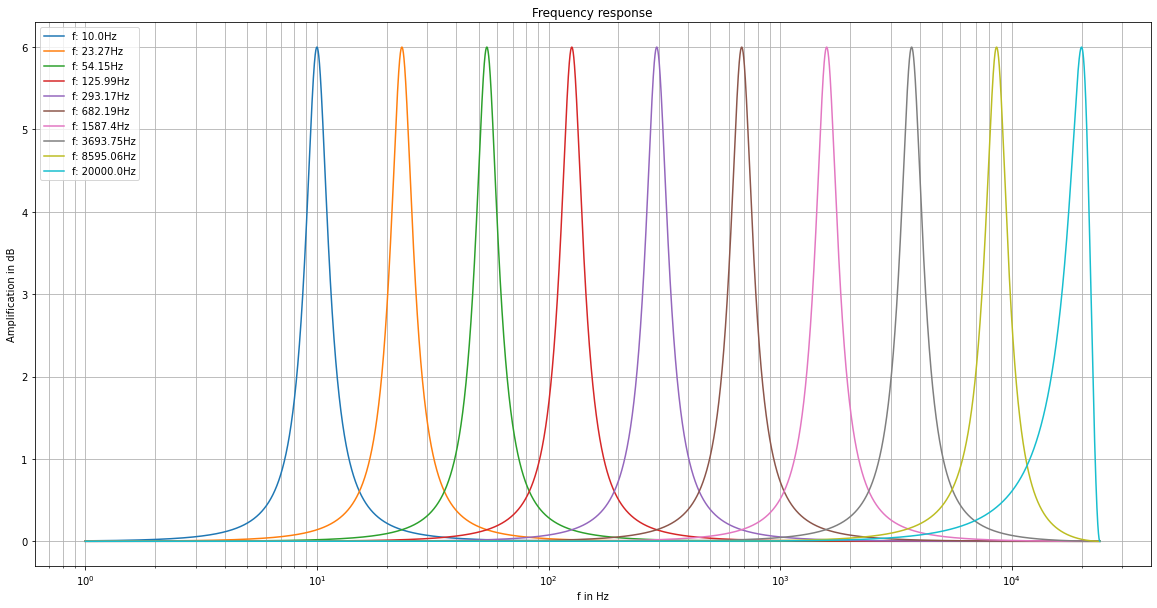

In [3]:
# Sweep through frequencies
f = np.logspace(np.log10(10), np.log10(20e3), 10)
legend=[]

plt.figure(figsize=(20,10))
for i in f:
    x,y = eq.second_order(freq=i,gain=6)
    plt.semilogx(x, 20*np.log10(np.abs(y)))
    legend.append("f: " + str(np.round(i,2)) + "Hz")
plt.grid(True, which="both")
plt.title("Frequency response")
plt.ylabel("Amplification in dB")
plt.xlabel("f in Hz")
plt.legend(legend)

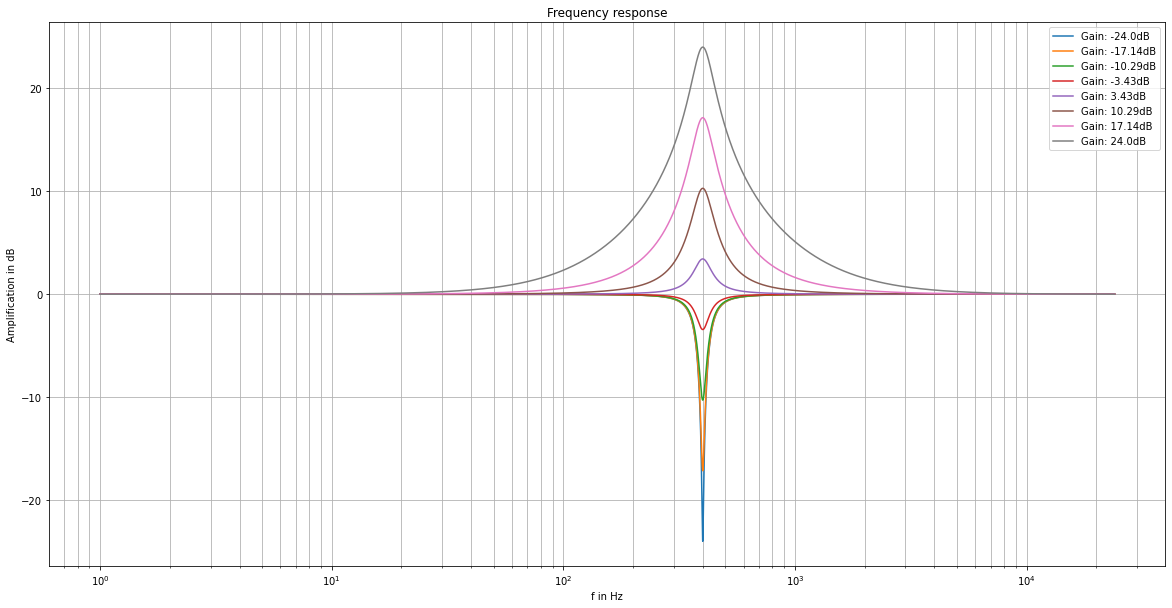

In [5]:
# Sweep through gains
gains = np.linspace(-24, 24, 8)
legend=[]

plt.figure(figsize=(20,10))
for i in gains:
    x,y = eq.second_order(freq=400,gain=i, Q_fac=5)
    plt.semilogx(x, 20*np.log10(np.abs(y)))
    legend.append("Gain: " + str(np.round(i,2)) + "dB")
plt.grid(True, which="both")
plt.title("Frequency response")
plt.ylabel("Amplification in dB")
plt.xlabel("f in Hz")
plt.legend(legend)

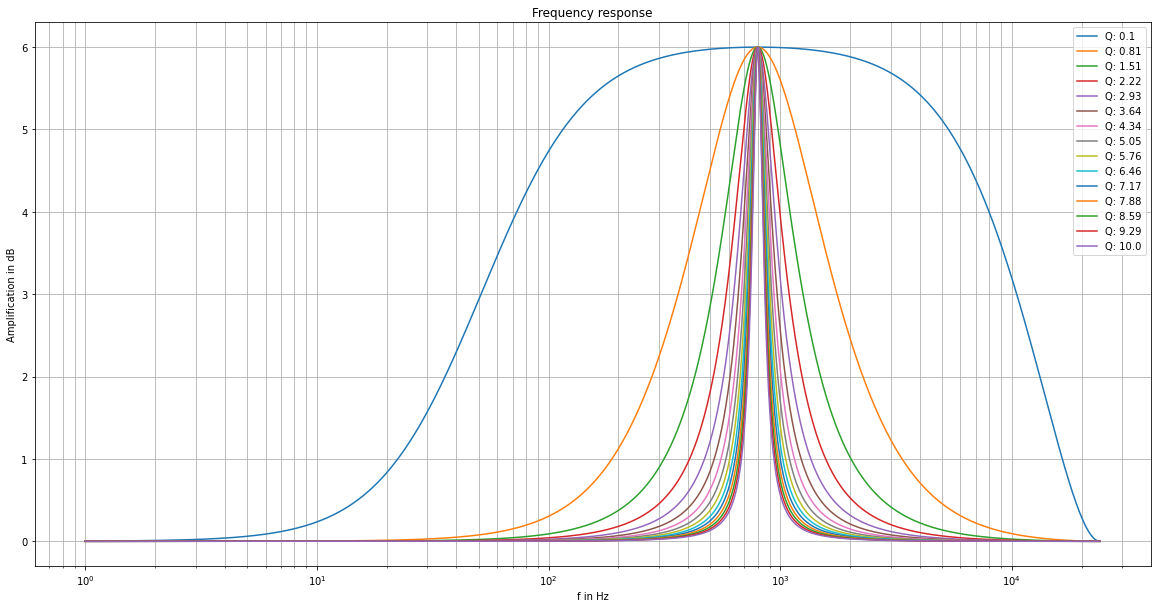

In [6]:
# Sweep through Q-factors
Q_fac = np.linspace(0.1,10, 15)
legend=[]

plt.figure(figsize=(20,10))
for i in Q_fac:
    x,y = eq.second_order(freq=800,gain=6, Q_fac=i)
    plt.semilogx(x, 20*np.log10(np.abs(y)))
    legend.append("Q: " + str(np.round(i,2)))
plt.grid(True, which="both")
plt.title("Frequency response")
plt.ylabel("Amplification in dB")
plt.xlabel("f in Hz")
plt.legend(legend)